In [42]:
#importing necessery libraries for future analysis of the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
#using pandas library and 'read_csv' function to read BlackFriday csv file as file already formated for us from Kaggle

ab = pd.read_csv('AB_NYC_2019.csv')
ab.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [45]:
ab.info()
ab.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [47]:
#after looking at the head of the dataset we already were able to notice some NaN values, therefore need to examine missing values further before continuing with analysis

#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset

ab.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [49]:
#replacing all NaN values in 'reviews_per_month' with 0

ab.fillna({'reviews_per_month':0}, inplace=True)

In [50]:
#examing changes
ab.reviews_per_month.isnull().sum()

0

In [51]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
ab['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [8]:
ab['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [52]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
ab['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [53]:
#examining the no of unique values of neighbourhood 
ab['neighbourhood'].nunique()

221

In [54]:
#examining the unique values of room_type as this column will appear very handy for later analysis
ab['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [55]:
#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
ab['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
26377263      43
2119276       39
19303369      37
25237492      34
119669058     34
76104209      33
113805886     33
213781715     33
238321374     32
51501835      31
50760546      31
224414117     30
13347167      29
39528519      28
417504        28
            ... 
209237058      1
18594883       1
29285454       1
202449469      1
7708014        1
48677964       1
4443213        1
5960171        1
49753169       1
32846930       1
15535189       1
91757655       1
3266249        1
1723485        1
101809002      1
50945119       1
21148770       1
63407204       1
48161896       1
113110121      1
15397994       1
14337132       1
19729266       1
156843123      1
45483124       1
1641589        1
4070519        1
208106618     

In [56]:
#Name of that host who is the most bussiest 
ab[ab.host_id==219517861]['host_name'].unique()

array(['Sonder (NYC)'], dtype=object)

In [57]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})

In [61]:
top_host = ab['host_id'].value_counts().head(10)

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

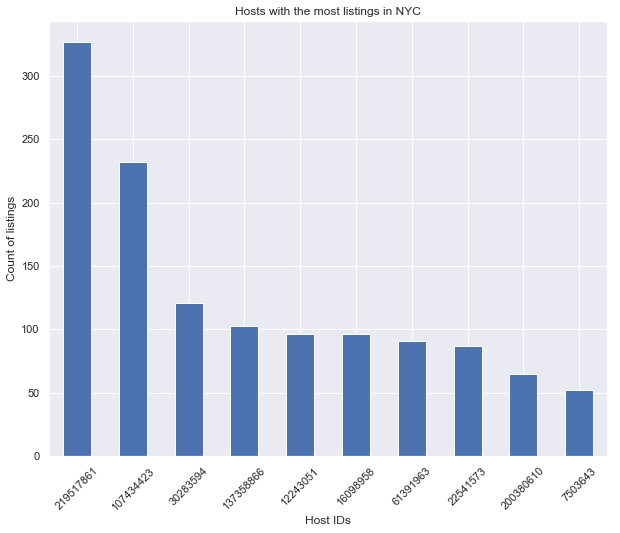

In [62]:
viz_1=top_host.plot(kind='bar')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

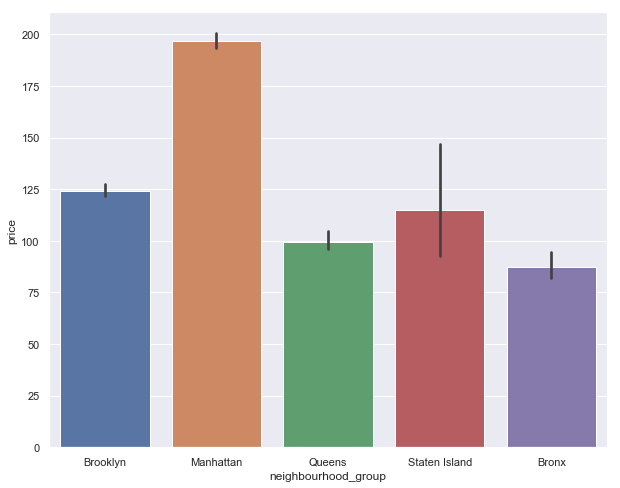

In [63]:
#Let's see which neighbourhood_groups' hotels are having high prices.
sns.barplot(x='neighbourhood_group',y='price',data=ab)

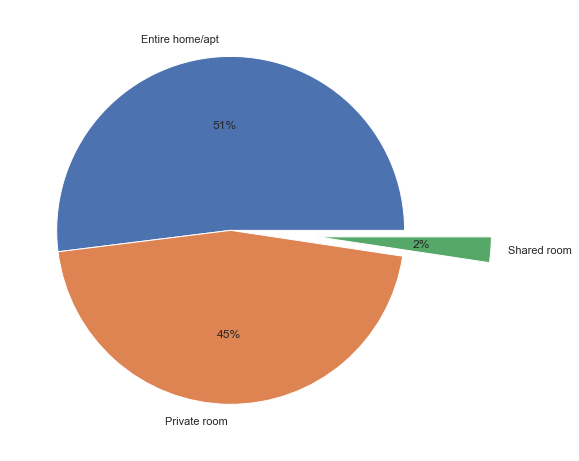

In [65]:
#Let's see what type of rooms guests are interested to avail most
roomdf = ab.room_type.value_counts()/ab['room_type'].count()*100
labels = roomdf.index
values = roomdf.values
plt.pie(x=values,labels=labels,autopct='%li%%',explode=(0,0,0.5))
plt.show()

In [71]:
#Which hotels are having 'zero' availaibility for this year
ab.loc[ab['availability_365']==ab['availability_365'].min()]

id                                               name    host_id  \
4          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
6          5121                                    BlissArtsSpace!       7356   
8          5203                 Cozy Clean Guest Room - Family Apt       7490   
14         6090                      West Village Nest - Superhost      11975   
20         7801                   Sweet and Spacious Brooklyn Loft      21207   
26         8700  Magnifique Suite au N de Manhattan - vue Cloitres      26394   
48        13050                          bright and stylish duplex      50846   
66        16458  Light-filled 2B duplex in the heart of Park Sl...      64056   
88        20300                             Great Location for NYC      76627   
94        20913                 Charming 1 bed GR8 WBurg LOCATION!      79402   
123       27883                             East Village Sanctuary     120223   
132       30031                   NYC artists’ loft with roof deck     129352   
142       32331                       Sunny, Cobble Hill Apartment     139874   
165       41348  * Spacious GARDEN Park Slope Duplex* 6 people max     180083   
166       41513                Convenient cozy cheap apt Manhattan     181167   
174       44221                     Financial District Luxury Loft     193722   
179       45542                    Clean and Cozy Harlem Apartment     202249   
180       45556              Fort Greene, Brooklyn: Center Bedroom      67778   
189       47370                 Chelsea Studio sublet 1 - 2 months     214287   
193       51438                1 Bedroom in 2 Bdrm Apt- Upper East     236421   
197       53137                Quiet, sunny Midtown Manhattan apt.     240360   
198       53196                  Big Room/Washer-Dryer/Wifi/AC/JMZ     247432   
214       55982                 Cozy 2 br in sunny Fort Greene apt     264928   
220       57468                    Modern, Large East Village Loft     239208   
232       59855                            One bedroom Apt. in NYC     288031   
239       60794                 Bright and spacious, garden below!     293394   
241       61167                   Colorful Private One Bedroom Apt     295760   
243       61406                       Great room in great location     297176   
250       62461                        B NYC Staten Alternative...     303939   
259       63573                       Small tidy bedroom in duplex     310458   
...         ...                                                ...        ...   
46491  35269041                                           87st 203   19303369   
46494  35269147  2部屋でのｼｪｱ ﾌﾞﾙｯｸﾘﾝの大人気ｴﾘｱのｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞから3駅 駅から徒歩...   19303369   
46510  35283981     PRIVATE suite / luxury building / west Chelsea   54481883   
46513  35284472                                       Cozy bedroom  220159422   
46517  35285908         SUNNY GREEN OAISIS IN BEDSTUY/CLINTON HILL  118375910   
46531  35291681  COZY Private Room, Queens/Jackson Heights/Elmh...   29731292   
46532  35292625                       Room-cabin in Hell's kitchen  137191484   
46583  35329913  Charming Brooklyn Garden apt - historic Macdon...   46724430   
46642  35354079  Cozy and luxurious apt in heart of Upper East ...   50484258   
46765  35424418                                Sunny Northern Nook   23455550   
47175  35615687       Duplex Apartment  3 bedroom 2 bath (6 guest)  145082728   
47218  35642891                         Beautiful room in Bushwick  268138154   
47340  35702658            Bedroom in a Loft  12 minutes from Soho   22382915   
47558  35803121      Private room with a sofa bed in Greenpoint BK  138150256   
47572  35807159  Cozy, sunny entire two bedroom Bed-Stuy apartment   23196609   
47614  35832547              Big 1 Bedroom located in Union Square   95000637   
47698  35873124  Bright and Spacious Apartment in East Williams...  269818165   
47914  35978071  Urban Heaven in the City! N

In [72]:
#How many hotels have 'zero' availability
ab.loc[ab['availability_365']==ab['availability_365'].min()].count()

id                                17533
name                              17521
host_id                           17533
host_name                         17520
neighbourhood_group               17533
neighbourhood                     17533
latitude                          17533
longitude                         17533
room_type                         17533
price                             17533
minimum_nights                    17533
number_of_reviews                 17533
last_review                       12688
reviews_per_month                 17533
calculated_host_listings_count    17533
availability_365                  17533
dtype: int64

In [74]:
#Which hotels are still available and we can book for any time for this year
ab.loc[ab['availability_365']==ab['availability_365'].max()]

id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
36        11452                        Clean and Quiet in Brooklyn       7355   
38        11943                          Country space in the city      45445   
97        21644                          Upper Manhattan, New York      82685   
139       32037                 Huge Private  Floor at The Waverly     116599   
164       40453    Charming & Cozy midtown loft any WEEK ENDS  !!!     174025   
181       45910                 Beautiful Queens Brownstone! - 5BR     204539   
196       51850                              ( F) Excellent/Pvt Rm      27848   
200       53470                 Clean and convenient 2BR apartment     204539   
201       53477                                3 floors of luxury!     204539   
204       54466                Beautiful Uptown Manhattan apartmnt     253385   
229       59121                  Nice, clean, safe, convenient 3BR     204539   
235       60611                        SpaHa Studio Monthly Rental     292204   
237       60673                 Private Room/bath Luxurious Harlem     249372   
258       63546                     Large and Cozy Private Bedroom     308652   
261       63610   DOMINIQUE'S NY mini efficiency* wifi*metro*quiet     310670   
345       89427                               The Brooklyn Waverly     116599   
348       94035  Modern, Safe, Clean, Bright Room in Astoria for 2      35375   
349       94209                 LARGE 1BR (CONV 2BR) CROWN HEIGHTS     503800   
354       96471                  The Brooklyn Waverly, One Bedroom     116599   
366      103806                  BOHEMIAN EAST VILLAGE 2 BED HAVEN     251176   
397      125594                 SUPER BIG AND COZY PRIVATE BEDROOM     308652   
444      154934                  Harlem/Hamilton Heights Cozy Room     745069   
449      158290                Clinton Hill + Free Coffee = #smile     759583   
520      189181         Room in Chic Modern High Line Luxury- New!     912541   
642      243229                           2BR  Apt - 20min to Soho    1276497   
660      250536                                The Lenox in Harlem    1313306   
661      250537                                The Lenox in Harlem    1313306   
683      254131                Read it 1st, A seprat fur BR, low $    1267021   
...         ...                                                ...        ...   
47924  35991399       Half rental fee the first month in Brooklyn!   89264510   
47925  35991548                                           Serenity  266981597   
47934  35995074  Amazing*Quiet*Sunny*Bedroom*PrivateLivingRm*Ch...    4128829   
47968  36004612                               637 Hawthorne Street  270871567   
48000  36031282        Luxury, Doorman, Steps From United Nations,   52950465   
48043  36056808       Luxury TriBeCa Apartment at an amazing price  271248669   
48050  36061406     Chelsea Loft Living - Perfect for LARGE groups   63492343   
48109  36082721                                   Upper Court Room   57023844   
48148  36109087                              ROSE QUARTZ 1 BEDROOM    9093418   
48330  36205494                                   bensonhurst area   60456157   
48336  36206222       Ladies  Flower Youth Hostel(only for girls )   67567916   
48341  36206792                     Woman Flower (only for girls )   67567916   
48418  36243744  Single bed step to Citi Field, LGA, JFK,Manhattan  217463199   
48420  36244479   Private Room:  Have your own and share some comm  272609175   
48468  36276859  NYC STYLE - SUBWAY AREA 10 MINUTES TO TIMES SQ...   24187843   
48515  36305881                              Manhattan On The Hill  273038911   
48545  36312667  My Cozy Apartment!\nMy apartment has the best ...  272870209   
48556  36315267         Great Soho Apartment

In [75]:
#Bussiest neighbourhood_group
ab.groupby('neighbourhood_group').count()['availability_365'].idxmax()

'Manhattan'

In [76]:
#Not so busy neighbourhood_group and we can book hotels for any time of this year there
ab.groupby('neighbourhood_group').count()['availability_365'].idxmin()

'Staten Island'

In [77]:
#Removing Outliers

ab = ab.drop(ab[(ab['minimum_nights']>365)].index)
ab = ab.dropna(subset=['host_name', 'name'])  # Removing null values

In [79]:
#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=ab.nlargest(10,'number_of_reviews')
top_reviewed_listings

id                                               name   host_id  \
11759   9145202                            Room near JFK Queen Bed  47621202   
2031     903972                         Great Bedroom in Manhattan   4734398   
2030     903947                     Beautiful Bedroom in Manhattan   4734398   
2015     891117                       Private Bedroom in Manhattan   4734398   
13495  10101135                            Room Near JFK Twin Beds  47621202   
10623   8168619                  Steps away from Laguardia airport  37312959   
1879     834190           Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
20403  16276632  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
4870    3474320                 Private brownstone studio Brooklyn  12949460   
471      166172                    LG Private Room/Family Friendly    792159   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
11759      Dona              Queens          Jamaica  40.66730  -73.76831   
2031         Jj           Manhattan           Harlem  40.82085  -73.94025   
2030         Jj           Manhattan           Harlem  40.82124  -73.93838   
2015         Jj           Manhattan           Harlem  40.82264  -73.94041   
13495      Dona              Queens          Jamaica  40.66939  -73.76975   
10623      Maya              Queens    East Elmhurst  40.77006  -73.87683   
1879      Carol           Manhattan  Lower East Side  40.71921  -73.99116   
20403  Danielle              Queens    East Elmhurst  40.76335  -73.87007   
4870        Asa            Brooklyn       Park Slope  40.67926  -73.97711   
471       Wanda            Brooklyn         Bushwick  40.70283  -73.92131   

             room_type  price  minimum_nights  number_of_reviews last_review  \
11759     Private room     47               1                629  2019-07-05   
2031      Private room     49               1                607  2019-06-21   
2030      Private room     49               1                597  2019-06-23   
2015      Private room     49               1                594  2019-06-15   
13495     Private room     47               1                576  2019-06-27   
10623     Private room     46               1                543  2019-07-01   
1879      Private room     99               2                540  2019-07-06   
20403     Private room     48               1                510  2019-07-06   
4870   Entire home/apt    160               1                488  2019-07-01   
471       Private room     60               3                480  2019-07-07   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173  
10623              11.59                               5               163  
1879                6.95                               1               179  
20403              16.22                               5               341  
4870                8.14                               1               269  
471                 6.70                               1                 0

In [80]:
#Avg price for one night
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


In [83]:
#Importing necessary libraries to visualize in map using plotly

import plotly.offline as pyo
import plotly.graph_objs as go
import plotly_express as px

In [84]:
mapbox_access_token = 'pk.eyJ1IjoiYmlkZHkiLCJhIjoiY2pxNWZ1bjZ6MjRjczRhbXNxeG5udzkyNSJ9.xX6QLOAcoBmXZdUdocAeuA'
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(ab, lat="latitude", lon="longitude", color="neighbourhood_group", size = 'price', opacity= 0.8,
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=16, zoom=9.2,height=400, width=800 )
fig.update_layout(
    mapbox_style="white-bg",
    showlegend = False,
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        },
        {
            "sourcetype": "raster",
            "source": ["https://geo.weather.gc.ca/geomet/?"
                       "SERVICE=WMS&VERSION=1.3.0&REQUEST=GetMap&BBOX={bbox-epsg-3857}&CRS=EPSG:3857"
                       "&WIDTH=1000&HEIGHT=1000&LAYERS=RADAR_1KM_RDBR&TILED=true&FORMAT=image/png"],
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":4})
fig.show() 
